In [0]:
# Import the machine learning libraries.
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from IPython.core.display import display
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

In [0]:
image1 = '/content/drive/My Drive/ML_Code/Pretrained Models/apple.jpg'
image2 = '/content/drive/My Drive/ML_Code/Pretrained Models/black_shoes.jpg'
image3 = '/content/drive/My Drive/ML_Code/Pretrained Models/boat.jpg'
image4 = '/content/drive/My Drive/ML_Code/Pretrained Models/cup.jpg'
image5 = '/content/drive/My Drive/ML_Code/Pretrained Models/windsurfing.jpg'

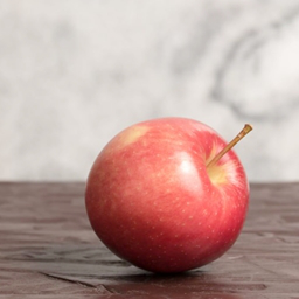

In [54]:
pic1 = load_img(image1, target_size=(299, 299))
display(pic1)

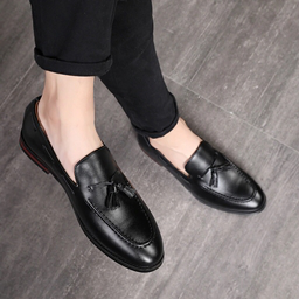

In [55]:
pic2 = load_img(image2, target_size=(299, 299))
display(pic2)

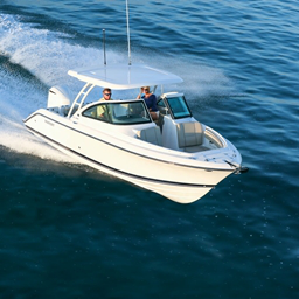

In [56]:
pic3 = load_img(image3, target_size=(299, 299))
display(pic3)

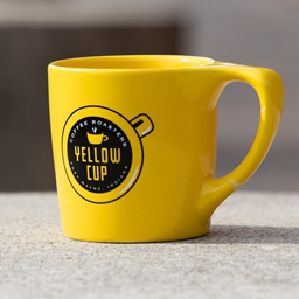

In [57]:
pic4 = load_img(image4, target_size=(299, 299))
display(pic4)

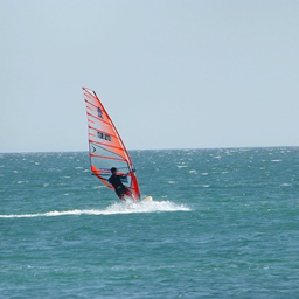

In [58]:
pic5 = load_img(image5, target_size=(299, 299))
display(pic5)

In [59]:
pic_array1 = img_to_array(pic1)
pic_array2 = img_to_array(pic2)
pic_array3 = img_to_array(pic3)
pic_array4 = img_to_array(pic4)
pic_array5 = img_to_array(pic5)
print(pic_array1.shape, pic_array2.shape, pic_array3.shape, pic_array4.shape, pic_array5.shape)

(299, 299, 3) (299, 299, 3) (299, 299, 3) (299, 299, 3) (299, 299, 3)


In [60]:
expanded1 = np.expand_dims(pic_array1, axis=0)
expanded2 = np.expand_dims(pic_array2, axis=0)
expanded3 = np.expand_dims(pic_array3, axis=0)
expanded4 = np.expand_dims(pic_array4, axis=0)
expanded5 = np.expand_dims(pic_array5, axis=0)
print(expanded1.shape, expanded2.shape, expanded3.shape, expanded4.shape, expanded5.shape)

(1, 299, 299, 3) (1, 299, 299, 3) (1, 299, 299, 3) (1, 299, 299, 3) (1, 299, 299, 3)


In [61]:
preprocessed1 = preprocess_input(expanded1)
preprocessed2 = preprocess_input(expanded2)
preprocessed3 = preprocess_input(expanded3)
preprocessed4 = preprocess_input(expanded4)
preprocessed5 = preprocess_input(expanded5)
print(preprocessed1.shape, preprocessed2.shape, preprocessed3.shape, preprocessed4.shape, preprocessed5.shape)

(1, 299, 299, 3) (1, 299, 299, 3) (1, 299, 299, 3) (1, 299, 299, 3) (1, 299, 299, 3)


In [0]:
# InceptionResNetv2
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299,299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis=0)
  return preprocess_input(expanded)

In [0]:
# VGG19
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_arr = img_to_array(pic)
  expanded = pic_arr.reshape(1, pic_arr.shape[0], pic_arr.shape[1], pic_arr.shape[2])
  return preprocess_input_vgg19(expanded)

### **Load and Test InceptionResNet**


In [64]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 11.5 s, sys: 257 ms, total: 11.7 s
Wall time: 11.4 s


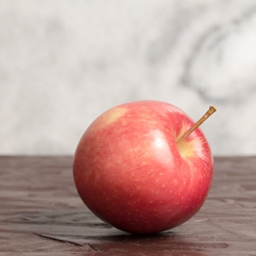

[[('n07742313', 'Granny_Smith', 0.9255124),
  ('n07747607', 'orange', 0.0027130204),
  ('n07753592', 'banana', 0.0016962873),
  ('n07749582', 'lemon', 0.0013535962),
  ('n03127925', 'crate', 0.0012541596)]]

In [65]:
# Apple
inception_data1 = format_img_inceptionresnet(image1)
inception_prediction1 = inception_model.predict(inception_data1)
display(load_img(image1))
decode_predictions(inception_prediction1)

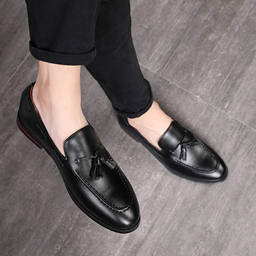

[[('n03680355', 'Loafer', 0.9262146),
  ('n04350905', 'suit', 0.00089969987),
  ('n04133789', 'sandal', 0.0007973925),
  ('n04200800', 'shoe_shop', 0.00050265045),
  ('n03594734', 'jean', 0.0005024907)]]

In [66]:
# Black shoes
inception_data2 = format_img_inceptionresnet(image2)
inception_prediction2 = inception_model.predict(inception_data2)
display(load_img(image2))
decode_predictions(inception_prediction2)

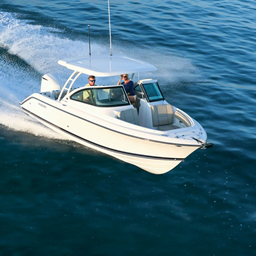

[[('n04273569', 'speedboat', 0.8620284),
  ('n02981792', 'catamaran', 0.015676929),
  ('n09332890', 'lakeside', 0.005335887),
  ('n03216828', 'dock', 0.002872243),
  ('n02704792', 'amphibian', 0.0028386367)]]

In [67]:
# Boat
inception_data3 = format_img_inceptionresnet(image3)
inception_prediction3 = inception_model.predict(inception_data3)
display(load_img(image3))
decode_predictions(inception_prediction3)

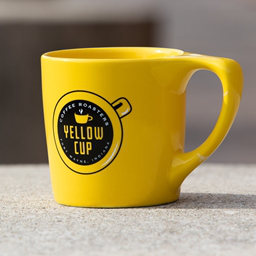

[[('n07930864', 'cup', 0.50105286),
  ('n03063599', 'coffee_mug', 0.39043254),
  ('n07920052', 'espresso', 0.014807232),
  ('n04398044', 'teapot', 0.001466604),
  ('n03063689', 'coffeepot', 0.0014328295)]]

In [68]:
# Cup
inception_data4 = format_img_inceptionresnet(image4)
inception_prediction4 = inception_model.predict(inception_data4)
display(load_img(image4))
decode_predictions(inception_prediction4)

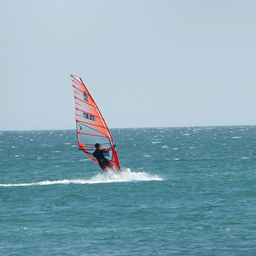

[[('n02981792', 'catamaran', 0.9441697),
  ('n03888257', 'parachute', 0.002512082),
  ('n04273569', 'speedboat', 0.0015225705),
  ('n09428293', 'seashore', 0.0012544584),
  ('n03873416', 'paddle', 0.0011675467)]]

In [69]:
# Windsurfing
inception_data5 = format_img_inceptionresnet(image5)
inception_prediction5 = inception_model.predict(inception_data5)
display(load_img(image5))
decode_predictions(inception_prediction5)

### **Load and Test VGG19**

In [70]:
%%time
vgg19_model = VGG19()

CPU times: user 3.06 s, sys: 2.56 s, total: 5.63 s
Wall time: 3.77 s


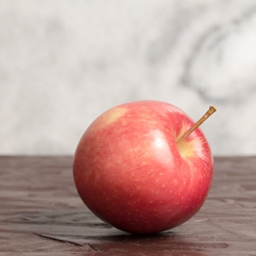

[[('n12768682', 'buckeye', 0.41858643),
  ('n07768694', 'pomegranate', 0.3244493),
  ('n12620546', 'hip', 0.04772574),
  ('n07742313', 'Granny_Smith', 0.020264193),
  ('n07747607', 'orange', 0.019069916)]]

In [71]:
# Apple
vgg19_data1 = format_img_vgg19(image1)
vgg19_prediction1 = vgg19_model.predict(vgg19_data1)
display(load_img(image1))
decode_vgg19(vgg19_prediction1)

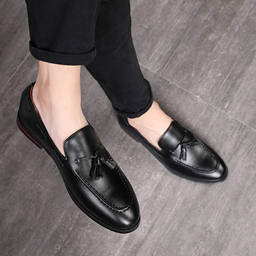

[[('n03680355', 'Loafer', 0.96331954),
  ('n04133789', 'sandal', 0.028557243),
  ('n04200800', 'shoe_shop', 0.0037174392),
  ('n03047690', 'clog', 0.0014520971),
  ('n03124043', 'cowboy_boot', 0.0008501917)]]

In [72]:
# Black shoes
vgg19_data2 = format_img_vgg19(image2)
vgg19_prediction2 = vgg19_model.predict(vgg19_data2)
display(load_img(image2))
decode_vgg19(vgg19_prediction2)

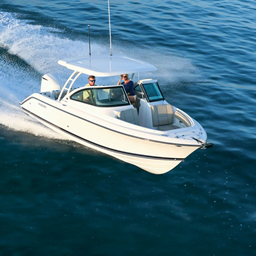

[[('n04273569', 'speedboat', 0.77401793),
  ('n02981792', 'catamaran', 0.117260456),
  ('n04483307', 'trimaran', 0.10275917),
  ('n02704792', 'amphibian', 0.003205195),
  ('n04347754', 'submarine', 0.0011634825)]]

In [73]:
# Boat
vgg19_data3 = format_img_vgg19(image3)
vgg19_prediction3 = vgg19_model.predict(vgg19_data3)
display(load_img(image3))
decode_vgg19(vgg19_prediction3)

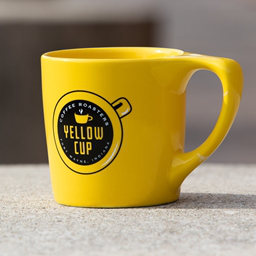

[[('n03063599', 'coffee_mug', 0.70406216),
  ('n07930864', 'cup', 0.29176262),
  ('n07920052', 'espresso', 0.0017856143),
  ('n04579145', 'whiskey_jug', 0.0012586187),
  ('n03950228', 'pitcher', 0.00047153165)]]

In [74]:
# Cup
vgg19_data4 = format_img_vgg19(image4)
vgg19_prediction4 = vgg19_model.predict(vgg19_data4)
display(load_img(image4))
decode_vgg19(vgg19_prediction4)

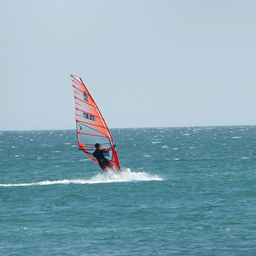

[[('n02981792', 'catamaran', 0.672368),
  ('n04483307', 'trimaran', 0.1519816),
  ('n04273569', 'speedboat', 0.11125703),
  ('n03662601', 'lifeboat', 0.027348774),
  ('n03888257', 'parachute', 0.009638641)]]

In [75]:
# Windsurfing
vgg19_data5 = format_img_vgg19(image5)
vgg19_prediction5 = vgg19_model.predict(vgg19_data5)
display(load_img(image5))
decode_vgg19(vgg19_prediction5)